In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten, AlphaDropout
import keras.callbacks as callbacks;
import os

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [63]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()
train.shape

(112799, 785)

In [64]:
x_train, x_valid = train[5000:, 1:], train[:5000, 1:]
x_train, x_valid = x_train / 255.0, x_valid/ 255.0
y_train, y_valid = train[5000:, 0], train[:5000, 0]

x_train.shape, y_train.shape

((107799, 784), (107799,))

In [65]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [66]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(416, activation="relu"),
    AlphaDropout(rate=0.2),
    Dense(y_train_unique.size, activation="softmax")
])

In [67]:
model.summary(), model.input_shape

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 416)               326560    
                                                                 
 alpha_dropout_1 (AlphaDropo  (None, 416)              0         
 ut)                                                             
                                                                 
 dense_22 (Dense)            (None, 47)                19599     
                                                                 
Total params: 346,159
Trainable params: 346,159
Non-trainable params: 0
_________________________________________________________________


(None, (None, 784))

In [68]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(momentum=0.9), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [69]:
tensorboard_cb = callbacks.TensorBoard(run_logdir)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler_cb = callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb, lr_scheduler_cb, tensorboard_cb])

Epoch 1/100
3369/3369 [==============================] - 8s 2ms/step - loss: 1.6977 - sparse_categorical_accuracy: 0.5184 - val_loss: 0.9946 - val_sparse_categorical_accuracy: 0.7146 - lr: 0.0100
Epoch 2/100
3369/3369 [==============================] - 8s 2ms/step - loss: 1.2139 - sparse_categorical_accuracy: 0.6407 - val_loss: 0.8298 - val_sparse_categorical_accuracy: 0.7632 - lr: 0.0100
Epoch 3/100
3369/3369 [==============================] - 8s 2ms/step - loss: 1.0785 - sparse_categorical_accuracy: 0.6769 - val_loss: 0.7538 - val_sparse_categorical_accuracy: 0.7836 - lr: 0.0100
Epoch 4/100
3369/3369 [==============================] - 7s 2ms/step - loss: 1.0078 - sparse_categorical_accuracy: 0.6958 - val_loss: 0.7141 - val_sparse_categorical_accuracy: 0.7970 - lr: 0.0100
Epoch 5/100
3369/3369 [==============================] - 8s 2ms/step - loss: 0.9674 - sparse_categorical_accuracy: 0.7074 - val_loss: 0.7022 - val_sparse_categorical_accuracy: 0.8078 - lr: 0.0100
Epoch 6/100
3369/336

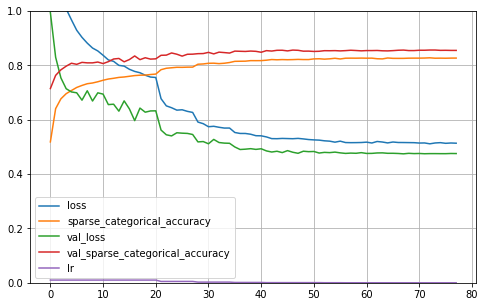

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [71]:
x_test = test[:3,1:]
x_test = x_test / 255.0
y_test = test[:3, 0]
x_test.shape, y_test.shape

((3, 784), (3,))

In [72]:
y_proba = model.predict(x_test)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.89, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
        0.09, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]], dtype=float32)

In [73]:
classes = numpy.argmax(y_proba, axis=1)
classes

array([39,  9, 26], dtype=int64)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
